# Atelier Machine Learning - Charles Trépanier

## Mission : Choisir le bon Pokémon pour gagner les combats !

En tant que dresseurs de Pokémon du 21e siècle, nous allons faire appel au Machine Learning pour nous aider à faire le bon choix de Pokémon et ainsi gagner nos combats.

### Objectif
Préconiser au dresseur de Pokémon l'animal à utiliser lors d'un combat afin d'être le vainqueur.

### Les étapes du projet
1. Définition du problème à résoudre
2. Acquisition des données d'apprentissages et de tests
3. Préparer et nettoyer les données
4. Analyser, explorer les données
5. Choisir un modèle d'apprentissage
6. Visualiser les résultats, et ajuster ou modifier le modèle d'apprentissage

## 1. Import des modules Python

Utilisation de :
- **Pandas** : pour la manipulation et l'analyse de données
- **NumPy** : pour la manipulation de tableaux et matrices

In [1]:
import numpy as np
import pandas as pd

# Configuration pour une meilleure mise en forme
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('future.no_silent_downcasting', True)

## 2. Chargement et exploration des données du Pokédex

### Données utilisées 

Chargement du fichier `pokedex.csv` et les données qu'il contient.

In [2]:
# Chargement des données du Pokédex
nosPokemons = pd.read_csv("datas/pokedex.csv")

# Affichage des colonnes du Dataframe
print("Colonnes disponibles :")
print(nosPokemons.columns.values)

Colonnes disponibles :
['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' 'NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']


### Affichage des 10 premières lignes

Visualisation des premières observations pour comprendre la structure des données.

In [3]:
# Affichage des 10 premières observations
print(nosPokemons.head(10))

   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salameche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     NaN             44              48   

   NIVEAU_DEFENSE  NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
0              49                       65                       65     

### Comptage et vérification des données

Nombre d'observations et s'il manque des données

In [4]:
# Comptage du nombre d'observations et de features
print("Dimensions du dataset (lignes, colonnes) :")
print(nosPokemons.shape)
print("\n")

# Informations sur notre jeu de données
print("Informations détaillées :")
print(nosPokemons.info())

Dimensions du dataset (lignes, colonnes) :
(800, 12)


Informations détaillées :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      799 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   NIVEAU_ATTAQUE           800 non-null    int64 
 6   NIVEAU_DEFENSE           800 non-null    int64 
 7   NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE  800 non-null    int64 
 9   VITESSE                  800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB
None


## 3. Nettoyage des données

### Recherche des valeurs manquantes

D'après l'analyse précédente, il manque :
- 1 nom de Pokémon (799/800)
- 387 valeurs de TYPE_2 (413/800) - Normal, car un Pokémon peut ne pas avoir de type secondaire

In [5]:
# Recherche de l'observation avec le nom manquant
print("Pokémon avec nom manquant :")
print(nosPokemons[nosPokemons['NOM'].isnull()])

Pokémon avec nom manquant :
    NUMERO  NOM  TYPE_1 TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
62      63  NaN  Combat    NaN             65             105              60   

    NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
62                       60                       70       95   

    NOMBRE_GENERATIONS LEGENDAIRE  
62                   1       FAUX  


### Identification du Pokémon manquant

Recherche des Pokémons voisins pour identifier celui qui manque.

In [6]:
# Affichage des Pokémons voisins (observations 61 et 63)
print("Pokémon avant (observation 61) :", nosPokemons['NOM'][61])
print("Pokémon après (observation 63) :", nosPokemons['NOM'][63])
print("\nD'après le Pokédex, le Pokémon manquant est : Colossinge")

Pokémon avant (observation 61) : Ferosinge
Pokémon après (observation 63) : Caninos

D'après le Pokédex, le Pokémon manquant est : Colossinge


### Correction de la valeur manquante

Ajout du nom du Pokémon manquant dans notre Dataframe.

In [7]:
# Création d'une copie pour le nettoyage
nosPokemonsClean = nosPokemons.copy()

# Remplacement de la valeur manquante
nosPokemonsClean.loc[62, 'NOM'] = "Colossinge"

# Vérification
print("Vérification de la correction :")
print(nosPokemonsClean['NOM'][62])

Vérification de la correction :
Colossinge


## 4. Transformation des données booléennes

### Conversion de la feature LEGENDAIRE

Pour le Machine Learning, nous devons transformer les valeurs textuelles 'VRAI'/'FAUX' en valeurs numériques 1/0.

In [8]:
# Remplacement de VRAI/FAUX par 1/0
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)

# Vérification
print("Affichage des 10 premières lignes après transformation :")
print(nosPokemonsClean.head(10))

Affichage des 10 premières lignes après transformation :
   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salameche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     NaN             44              48   

   NIVEAU_DEFENSE  NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
0              

## 5. Chargement et exploration des données de combats

### Analyse du fichier combats.csv

Ce fichier contient les résultats de 50 000 combats entre Pokémons.

In [9]:
# Chargement des données des combats
combats = pd.read_csv("datas/combats.csv")

# Affichage des colonnes du Dataframe
print("Colonnes disponibles :")
print(combats.columns.values)
print("\n")

# Affichage des 10 premières lignes du Dataframe
print("10 premières observations :")
print(combats.head(10))
print("\n")

# Comptage du nombre de lignes et de colonnes
print("Dimensions (lignes, colonnes) :")
print(combats.shape)
print("\n")

# Informations sur notre jeu de données
print("Informations détaillées :")
print(combats.info())

Colonnes disponibles :
['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']


10 premières observations :
   Premier_Pokemon  Second_Pokemon  Pokemon_Gagnant
0              266             298              298
1              702             701              701
2              191             668              668
3              237             683              683
4              151             231              151
5              657             752              657
6              192             134              134
7               73             545              545
8              220             763              763
9              302              31               31


Dimensions (lignes, colonnes) :
(50000, 3)


Informations détaillées :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Se

## 6. Calcul des statistiques de combats

### Nombre de combats menés par chaque Pokémon

Un Pokémon peut combattre en première position ou en seconde position. Calculons le nombre total de combats menés.

In [10]:
# Nombre de fois où chaque Pokémon a combattu en première position
nbFoisPremierePosition = combats.groupby('Premier_Pokemon').count()
print("Nombre de fois en première position (5 premiers) :")
print(nbFoisPremierePosition.head())
print("\n")

# Nombre de fois où chaque Pokémon a combattu en seconde position
nbFoisSecondePosition = combats.groupby('Second_Pokemon').count()
print("Nombre de fois en seconde position (5 premiers) :")
print(nbFoisSecondePosition.head())
print("\n")

# Nombre total de combats menés par chaque Pokémon
nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
print("Nombre total de combats (5 premiers) :")
print(nombreTotalDeCombats.head())

Nombre de fois en première position (5 premiers) :
                 Second_Pokemon  Pokemon_Gagnant
Premier_Pokemon                                 
1                            70               70
2                            55               55
3                            68               68
4                            62               62
5                            50               50


Nombre de fois en seconde position (5 premiers) :
                Premier_Pokemon  Pokemon_Gagnant
Second_Pokemon                                  
1                            63               63
2                            66               66
3                            64               64
4                            63               63
5                            62               62


Nombre total de combats (5 premiers) :
                 Pokemon_Gagnant  Premier_Pokemon  Second_Pokemon
Premier_Pokemon                                                  
1                            133      

### Nombre de victoires par Pokémon

Calcul du nombre de fois que chaque Pokémon a gagné ses combats.

In [11]:
# Nombre de victoires par Pokémon
nombreDeVictoires = combats.groupby('Pokemon_Gagnant').count()
print("Nombre de victoires (5 premiers) :")
print(nombreDeVictoires.head())
print("\n")

print("Informations sur les victoires :")
print(nombreDeVictoires.info())
print("\nATTENTION : Seulement 783 Pokémons ont gagné au moins un combat !")
print("Cela signifie que certains Pokémons n'ont jamais gagné.")

Nombre de victoires (5 premiers) :
                 Premier_Pokemon  Second_Pokemon
Pokemon_Gagnant                                 
1                             37              37
2                             46              46
3                             89              89
4                             70              70
5                             55              55


Informations sur les victoires :
<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 1 to 800
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  783 non-null    int64
 1   Second_Pokemon   783 non-null    int64
dtypes: int64(2)
memory usage: 18.4 KB
None

ATTENTION : Seulement 783 Pokémons ont gagné au moins un combat !
Cela signifie que certains Pokémons n'ont jamais gagné.


## 7. Agrégation des données avec le Pokédex

### Création d'une liste agrégée

Création d'une liste contenant pour chaque Pokémon :
- Le numéro du Pokémon
- Le nombre de combats menés
- Le nombre de victoires
- Le pourcentage de victoires

In [12]:
# Création de la liste à agréger
listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger = listeAAgreger.sort_index()

# Ajout du nombre de combats
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant

# Ajout du nombre de victoires
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon

# Calcul du pourcentage de victoires
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon / (nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant)

# Affichage de la nouvelle liste
print("Liste agrégée (10 premiers) :")
print(listeAAgreger.head(10))

Liste agrégée (10 premiers) :
                 Premier_Pokemon  Second_Pokemon  NBR_COMBATS  NBR_VICTOIRES  \
Pokemon_Gagnant                                                                
1                             37              37          133             37   
2                             46              46          121             46   
3                             89              89          132             89   
4                             70              70          125             70   
5                             55              55          112             55   
6                             64              64          118             64   
7                            115             115          133            115   
8                            119             119          139            119   
9                            114             114          135            114   
10                            19              19          117             19   

         

### Fusion avec le Pokédex

Utilisation de la fonction `merge()` pour créer un Pokédex enrichi avec les statistiques de combats.

In [13]:
# Agrégation des données
nouveauPokedex = nosPokemonsClean.merge(listeAAgreger, left_on='NUMERO', right_index=True, how='left')

# Affichage des statistiques du nouveau Pokédex
print("Statistiques descriptives du nouveau Pokédex :")
print(nouveauPokedex.describe())
print("\n")

# Affichage des 10 premières lignes
print("10 premiers Pokémons avec leurs statistiques de combats :")
print(nouveauPokedex.head(10))

Statistiques descriptives du nouveau Pokédex :
         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%

# PARTIE 2 - Analyse Statistique et Visualisation

## 1. Analyse statistique avec describe()

Analyse statistique de chaque features pour en dégager des caractéristiques intéressantes.

In [14]:
# Analyse statistique complète de notre jeu d'observations
print("Analyse statistique du Pokédex enrichi :")
print(nouveauPokedex.describe())

Analyse statistique du Pokédex enrichi :
         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%      

### Interprétation des statistiques

Pour la feature **NIVEAU_ATTAQUE** par exemple :
- **Count** : 800 observations (aucune donnée manquante)
- **Mean** : Niveau d'attaque moyen ~79
- **Std** : Écart type ~32 (données assez dispersées)
- **Min** : 5 (Pokémons très faibles)
- **Max** : 190 (Pokémons très puissants)
- **Quartiles** :
  - 25% des Pokémons ont un niveau d'attaque < 55
  - 50% des Pokémons ont un niveau d'attaque < 75
  - 75% des Pokémons ont un niveau d'attaque < 100
  - Seulement 25% ont un niveau d'attaque > 100 

**Conclusion** : Pour gagner, il faut utiliser un Pokémon dans le dernier quartile (niveau d'attaque > 100).

## 2. Visualisation des types de Pokémons

### Quels sont les types de Pokémons qu'un dresseur doit posséder ?

Pour maximiser les chances de gagner, le dresseur doit posséder les Pokémons les plus fréquemment rencontrés.

In [15]:
# Import des modules de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour de meilleurs graphiques
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

### Graphique des Pokémons par TYPE_1

Visualisons la distribution des Pokémons selon leur type primaire.

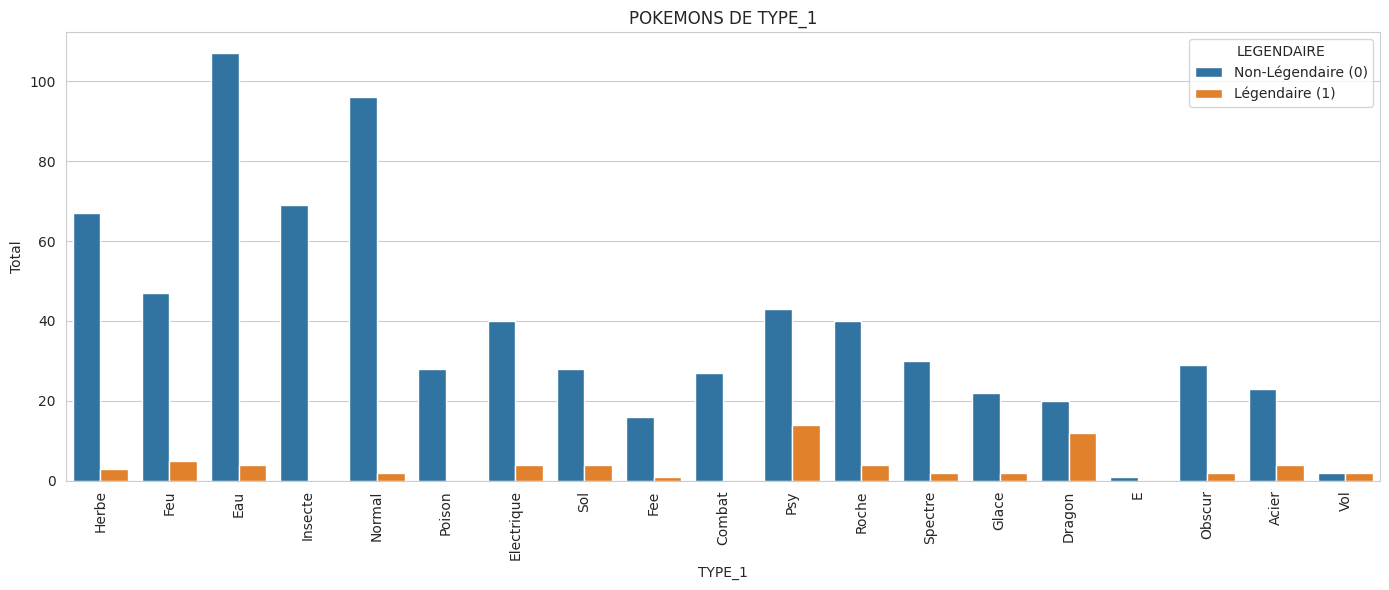

In [16]:
# Graphique des Pokémons par type primaire
plt.figure(figsize=(14, 6))
axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_1")
plt.legend(title='LEGENDAIRE', labels=['Non-Légendaire (0)', 'Légendaire (1)'])
plt.tight_layout()
plt.show()

### Graphique des Pokémons par TYPE_2

Visualisons maintenant la distribution des Pokémons selon leur type secondaire.

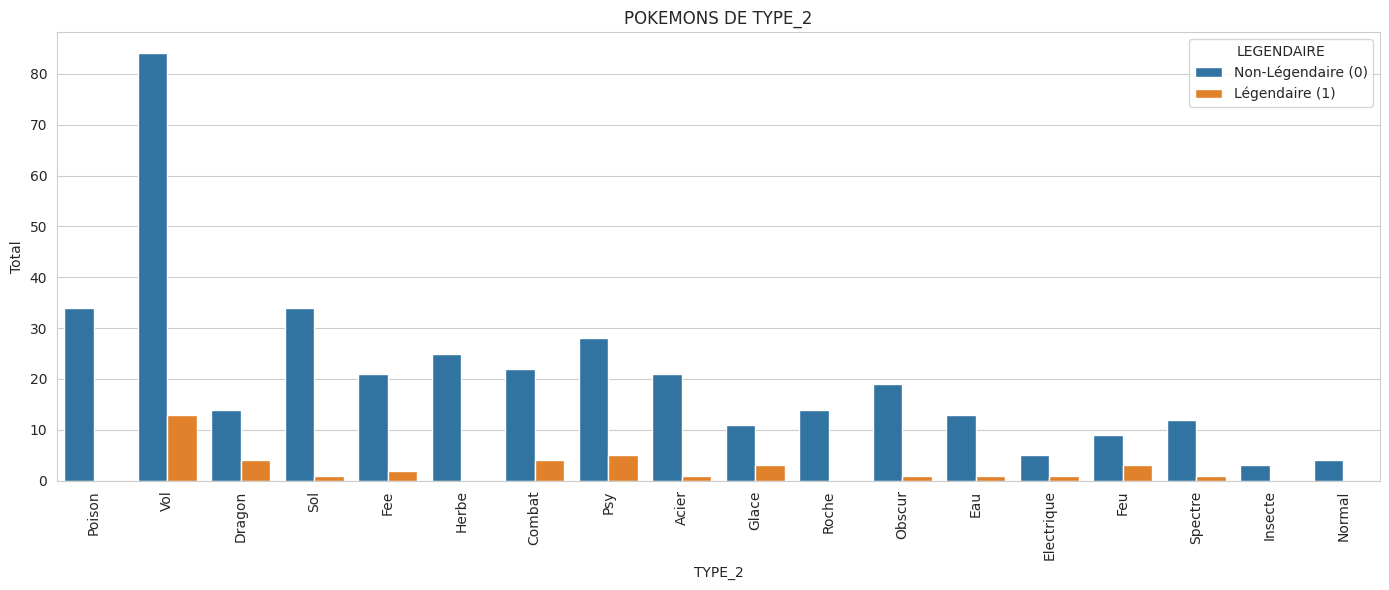


Un dresseur doit posséder des Pokémons de TYPE_1 : Herbe, Eau, Insecte, Normal
Et des Pokémons de TYPE_2 : Vol, Poison, Sol pour contrer les attaques


In [20]:
# Graphique des Pokémons par type secondaire
plt.figure(figsize=(14, 6))
axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_2')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_2")
plt.legend(title='LEGENDAIRE', labels=['Non-Légendaire (0)', 'Légendaire (1)'])
plt.tight_layout()
plt.show()

print("\nUn dresseur doit posséder des Pokémons de TYPE_1 : Herbe, Eau, Insecte, Normal")
print("Et des Pokémons de TYPE_2 : Vol, Poison, Sol pour contrer les attaques")

## 3. Les types de Pokémons gagnants et perdants

### Taux de victoire moyen par type

Analyse du type de Pokémon possédant le meilleur taux de victoire.

In [19]:
# Calcul de la moyenne des pourcentages de victoires par type
taux_victoires_par_type = nouveauPokedex.groupby('TYPE_1').agg({"POURCENTAGE_DE_VICTOIRES": "mean"}).sort_values(by="POURCENTAGE_DE_VICTOIRES")

print("Taux de victoire moyen par type de Pokémon (du plus faible au plus fort) :")
print(taux_victoires_par_type)
print("\n")

print("Types de Pokémons GAGNANTS (meilleurs taux de victoire) :")
print(taux_victoires_par_type.tail(4))
print("\n")

print("Types de Pokémons PERDANTS (plus faibles taux de victoire) :")
print(taux_victoires_par_type.head(5))

Taux de victoire moyen par type de Pokémon (du plus faible au plus fort) :
            POURCENTAGE_DE_VICTOIRES
TYPE_1                              
Fee                         0.329300
E                           0.343750
Roche                       0.404852
Acier                       0.424529
Poison                      0.433262
Insecte                     0.439006
Glace                       0.439604
Herbe                       0.440364
Eau                         0.470520
Combat                      0.475616
Spectre                     0.484027
Normal                      0.535578
Sol                         0.541526
Psy                         0.545747
Feu                         0.579215
Obscur                      0.629726
Electrique                  0.632861
Dragon                      0.633587
Vol                         0.765061


Types de Pokémons GAGNANTS (meilleurs taux de victoire) :
            POURCENTAGE_DE_VICTOIRES
TYPE_1                              
Obscur        

### Conclusion sur les types

**Types gagnants** : Obscur, Électrique, Dragon, Vol 

**Types perdants** : Fée, Eau, Roche, Acier, Poison 

**Exemple** : Pikachu (Électrique) vs Pokémon Fée → Pikachu a plus de chances de gagner 

## 4. Corrélation entre les données

### Existe-t-il un lien fort entre certaines caractéristiques et la victoire ?

Utilisation d'une HeatMap pour visualiser les corrélations entre les features.

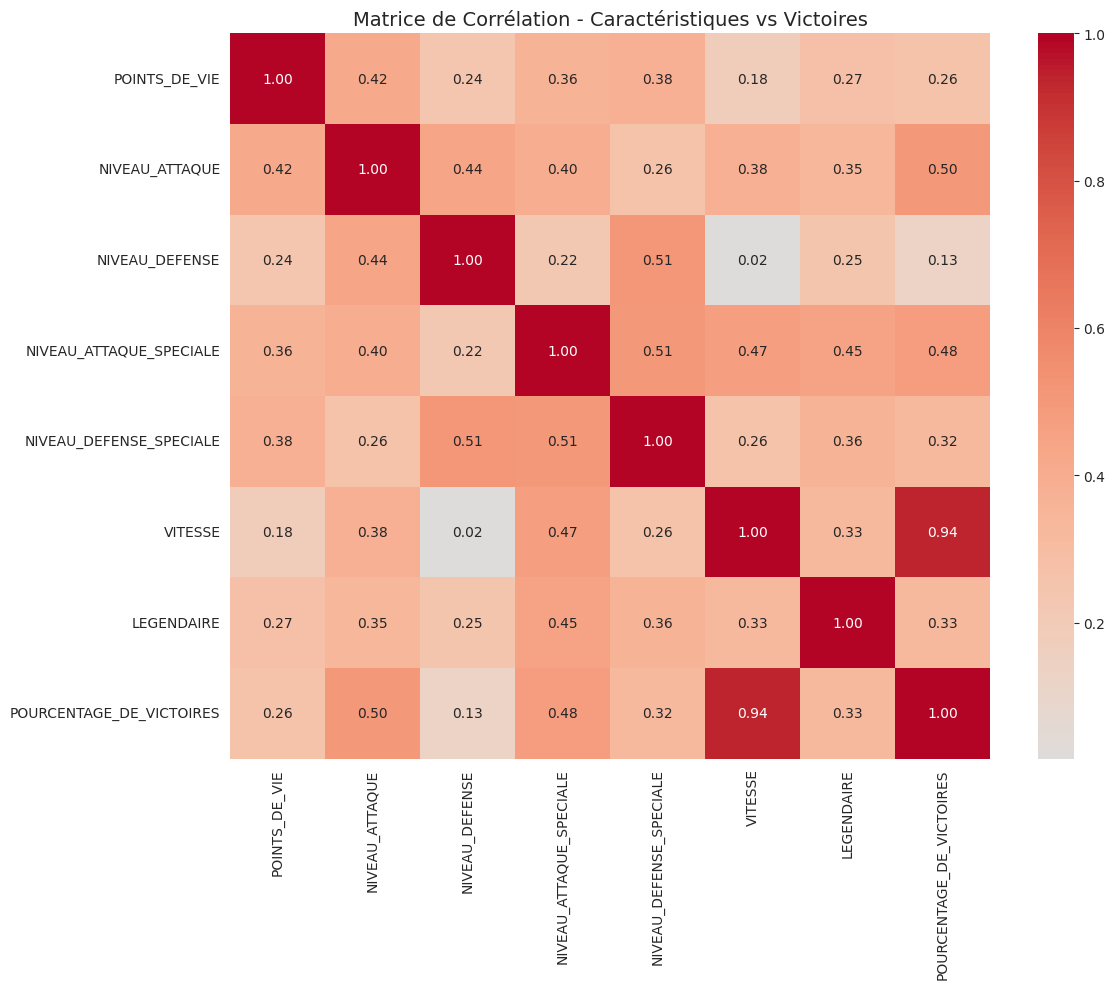

In [21]:
# Calcul de la matrice de corrélation
corr = nouveauPokedex.loc[:, ['POINTS_DE_VIE', 'NIVEAU_ATTAQUE',
                                'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE', 
                                'NIVEAU_DEFENSE_SPECIALE',
                                'VITESSE', 'LEGENDAIRE', 'POURCENTAGE_DE_VICTOIRES']].corr()

# Création de la HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title("Matrice de Corrélation - Caractéristiques vs Victoires", fontsize=14)
plt.tight_layout()
plt.show()

### Lecture de la HeatMap

**Comment lire ?** Plus le chiffre se rapproche de 1, plus la corrélation est forte.

**Corrélations avec POURCENTAGE_DE_VICTOIRES** :
- **VITESSE** : ~0.94 → Corrélation forte
- **NIVEAU_ATTAQUE** : ~0.50 → Corrélation moyenne
- **LEGENDAIRE** : ~0.33 → Corrélation faible 

**Conclusion majeure** : La **VITESSE** est le facteur le plus déterminant pour gagner un combat. Le Pokémon le plus rapide a quasi-automatiquement la victoire.

In [23]:
# Affichage détaillé des corrélations avec le pourcentage de victoires
print("Corrélations avec le POURCENTAGE_DE_VICTOIRES :")
print(corr['POURCENTAGE_DE_VICTOIRES'].sort_values(ascending=False))
print("\nLa VITESSE est le facteur le plus important (0.94) !")
print("Le NIVEAU_ATTAQUE arrive en second (0.50)")

Corrélations avec le POURCENTAGE_DE_VICTOIRES :
POURCENTAGE_DE_VICTOIRES    1.000000
VITESSE                     0.937742
NIVEAU_ATTAQUE              0.500181
NIVEAU_ATTAQUE_SPECIALE     0.478940
LEGENDAIRE                  0.325007
NIVEAU_DEFENSE_SPECIALE     0.324218
POINTS_DE_VIE               0.258006
NIVEAU_DEFENSE              0.129426
Name: POURCENTAGE_DE_VICTOIRES, dtype: float64

La VITESSE est le facteur le plus important (0.94) !
Le NIVEAU_ATTAQUE arrive en second (0.50)


## 5. Résumé de nos observations

### Pour remporter la victoire lors d'un combat, le dresseur de Pokémons doit :

1. **Posséder des Pokémons de type Herbe, Eau, Insecte et Normal** (les plus fréquents pour contrer les attaques)

2. **Posséder des Pokémons de type Obscur, Électrique, Dragon et Vol** (meilleurs taux de victoire)

3. **Utiliser un Pokémon ayant une grande vitesse** (facteur #1 avec corrélation de 0.94)

4. **Utiliser un Pokémon ayant un bon niveau d'attaque** (facteur #2 avec corrélation de 0.50)

## 6. Vérification de nos hypothèses

### Testons nos hypothèses sur quelques combats réels

Vérifions si nos observations se confirment avec des exemples de combats du fichier combats.csv.

In [25]:
# Exemples de combats à vérifier
# Format : Premier_Pokemon, Second_Pokemon, Pokemon_Gagnant
exemples_combats = [
    (155, 321, 155),
    (101, 583, 583),
    (404, 32, 32)
]

print("=" * 80)
print("VÉRIFICATION DES HYPOTHÈSES SUR DES COMBATS RÉELS")
print("=" * 80)

for i, (premier, second, gagnant) in enumerate(exemples_combats, 1):
    print(f"\n{'=' * 80}")
    print(f"COMBAT #{i} : Pokémon #{premier} vs Pokémon #{second}")
    print(f"Gagnant : Pokémon #{gagnant}")
    print("=" * 80)
    
    # Récupération des infos des deux Pokémons
    pokemon1 = nouveauPokedex[nouveauPokedex['NUMERO'] == premier][['NUMERO', 'NOM', 'TYPE_1', 'NIVEAU_ATTAQUE', 'VITESSE']].iloc[0]
    pokemon2 = nouveauPokedex[nouveauPokedex['NUMERO'] == second][['NUMERO', 'NOM', 'TYPE_1', 'NIVEAU_ATTAQUE', 'VITESSE']].iloc[0]
    
    print(f"\n{pokemon1['NOM']} (#{pokemon1['NUMERO']})")
    print(f"   Type: {pokemon1['TYPE_1']}")
    print(f"   Niveau Attaque: {pokemon1['NIVEAU_ATTAQUE']}")
    print(f"   Vitesse: {pokemon1['VITESSE']}")
    if pokemon1['NUMERO'] == gagnant:
        print(" VAINQUEUR")
    
    print(f"\n{pokemon2['NOM']} (#{pokemon2['NUMERO']})")
    print(f"   Type: {pokemon2['TYPE_1']}")
    print(f"   Niveau Attaque: {pokemon2['NIVEAU_ATTAQUE']}")
    print(f"   Vitesse: {pokemon2['VITESSE']}")
    if pokemon2['NUMERO'] == gagnant:
        print(" VAINQUEUR")
    
    # Analyse
    print(f"\nANALYSE :")
    if pokemon1['VITESSE'] > pokemon2['VITESSE']:
        print(f"   • {pokemon1['NOM']} est plus rapide ({pokemon1['VITESSE']} vs {pokemon2['VITESSE']})")
    else:
        print(f"   • {pokemon2['NOM']} est plus rapide ({pokemon2['VITESSE']} vs {pokemon1['VITESSE']})")
    
    if pokemon1['NIVEAU_ATTAQUE'] > pokemon2['NIVEAU_ATTAQUE']:
        print(f"   • {pokemon1['NOM']} a un meilleur niveau d'attaque ({pokemon1['NIVEAU_ATTAQUE']} vs {pokemon2['NIVEAU_ATTAQUE']})")
    else:
        print(f"   • {pokemon2['NOM']} a un meilleur niveau d'attaque ({pokemon2['NIVEAU_ATTAQUE']} vs {pokemon1['NIVEAU_ATTAQUE']})")
    
    # Vérification de l'hypothèse
    vainqueur_pokemon = pokemon1 if pokemon1['NUMERO'] == gagnant else pokemon2
    perdant_pokemon = pokemon2 if pokemon1['NUMERO'] == gagnant else pokemon1
    
    if vainqueur_pokemon['VITESSE'] > perdant_pokemon['VITESSE']:
        print(f"\n   HYPOTHÈSE CONFIRMÉE : Le Pokémon le plus rapide a gagné !")
    else:
        print(f"\n   Exception : Le Pokémon le plus lent a gagné (probablement grâce à l'attaque ou au type)")

print("\n" + "=" * 80)
print("NOS HYPOTHÈSES SONT VÉRIFIÉES !")
print("La VITESSE et le NIVEAU_ATTAQUE sont bien des facteurs déterminants.")
print("=" * 80)

VÉRIFICATION DES HYPOTHÈSES SUR DES COMBATS RÉELS

COMBAT #1 : Pokémon #155 vs Pokémon #321
Gagnant : Pokémon #155

Mega Ptera (#155)
   Type: Roche
   Niveau Attaque: 135
   Vitesse: 150
 VAINQUEUR

Makuhita (#321)
   Type: Combat
   Niveau Attaque: 60
   Vitesse: 25

ANALYSE :
   • Mega Ptera est plus rapide (150 vs 25)
   • Mega Ptera a un meilleur niveau d'attaque (135 vs 60)

   HYPOTHÈSE CONFIRMÉE : Le Pokémon le plus rapide a gagné !

COMBAT #2 : Pokémon #101 vs Pokémon #583
Gagnant : Pokémon #583

Spectrum (#101)
   Type: Spectre
   Niveau Attaque: 50
   Vitesse: 95

Zeblitz (#583)
   Type: Electrique
   Niveau Attaque: 100
   Vitesse: 116
 VAINQUEUR

ANALYSE :
   • Zeblitz est plus rapide (116 vs 95)
   • Zeblitz a un meilleur niveau d'attaque (100 vs 50)

   HYPOTHÈSE CONFIRMÉE : Le Pokémon le plus rapide a gagné !

COMBAT #3 : Pokémon #404 vs Pokémon #32
Gagnant : Pokémon #32

Rosabyss (#404)
   Type: Eau
   Niveau Attaque: 84
   Vitesse: 52

Raichu (#32)
   Type: Electrique

## 7. Sauvegarde du Dataset

### Sauvegarde pour éviter de refaire l'analyse

Sauvegarde d Pokédex enrichi dans un fichier CSV pour pouvoir l'utiliser directement lors de l'apprentissage.

In [27]:
# Sauvegarde du Dataframe Pokedex enrichi
dataset = nouveauPokedex
dataset.to_csv("datas/dataset.csv", sep='\t', index=False)

print("Dataset sauvegardé dans 'datas/dataset.csv'")
print(f"{len(dataset)} Pokémons avec {len(dataset.columns)} caractéristiques")
print("\nColonnes sauvegardées :")
print(dataset.columns.tolist())

Dataset sauvegardé dans 'datas/dataset.csv'
800 Pokémons avec 17 caractéristiques

Colonnes sauvegardées :
['NUMERO', 'NOM', 'TYPE_1', 'TYPE_2', 'POINTS_DE_VIE', 'NIVEAU_ATTAQUE', 'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE', 'NIVEAU_DEFENSE_SPECIALE', 'VITESSE', 'NOMBRE_GENERATIONS', 'LEGENDAIRE', 'Premier_Pokemon', 'Second_Pokemon', 'NBR_COMBATS', 'NBR_VICTOIRES', 'POURCENTAGE_DE_VICTOIRES']
